In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels import api as sm
import numpy as np
import os


In [ ]:
df = pd.read_csv('/content/train.csv')
df1 = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
df.columns
df = df.drop('wine_id',axis=1)
submission.head()

,wine_id,quality
0,1,6
1,2,6
2,3,6
3,4,6
4,5,6


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.28,0.30,5.3,0.054,44.0,161.0,0.99410,3.12,0.48,10.3,6
1,6.8,0.32,0.21,2.2,0.044,15.0,68.0,0.99320,3.17,0.39,9.4,6
2,6.0,0.17,0.29,5.0,0.028,25.0,108.0,0.99076,3.14,0.34,12.3,6
3,8.1,0.29,0.49,7.1,0.042,22.0,124.0,0.99440,3.14,0.41,10.8,6
4,5.0,0.35,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,6


In [ ]:
df1.head()

,wine_id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,6.2,0.36,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,0.50,9.4
1,2,6.4,0.18,0.32,9.6,0.052,24.0,90.0,0.99630,3.35,0.49,9.4
2,3,6.7,0.35,0.48,8.8,0.056,35.0,167.0,0.99628,3.04,0.47,9.4
3,4,7.7,0.39,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2
4,5,7.8,0.20,0.32,5.0,0.016,31.0,101.0,0.99186,2.99,0.39,11.0


In [ ]:
print(len(df))
print(len(df1))

3918
980


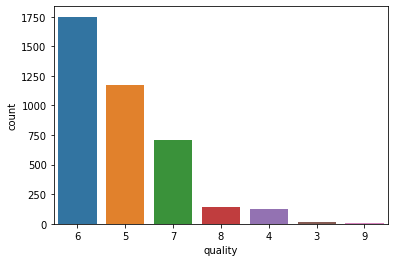

In [ ]:
sns.countplot(x = 'quality',data = df,order = df['quality'].value_counts().index)
plt.show()

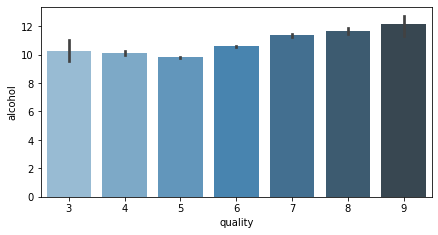

In [ ]:
plt.figure(figsize=(7,3.5))
sns.barplot (x='quality',y='alcohol', data = df, palette = 'Blues_d')
plt.show()

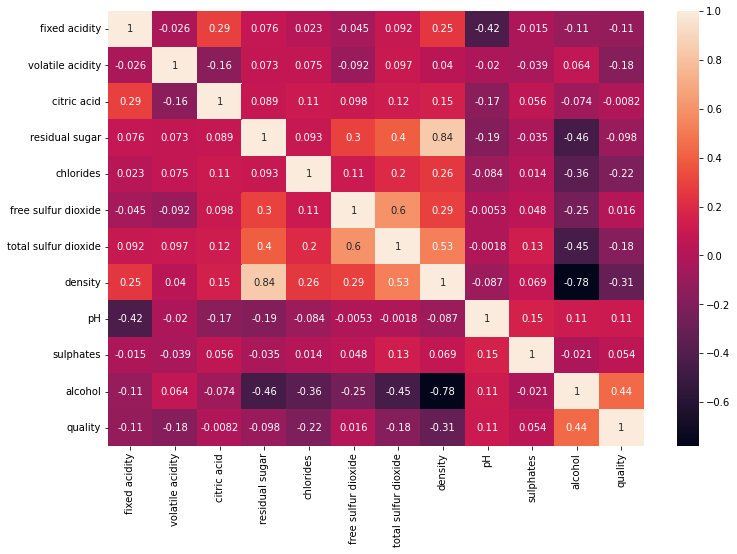

In [ ]:
plt.figure(figsize=(12, 8))
df_corr = df.corr()
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values, annot = True);


In [ ]:
x=df.drop(['quality'],axis=1)
y=df['quality']
df1=df1.drop(['wine_id'],axis=1)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(x)
X_train

array([[0.34615385, 0.21621622, 0.24390244, ..., 0.36363636, 0.30232558,
        0.37096774],
       [0.28846154, 0.25945946, 0.17073171, ..., 0.40909091, 0.19767442,
        0.22580645],
       [0.21153846, 0.0972973 , 0.23577236, ..., 0.38181818, 0.13953488,
        0.69354839],
       ...,
       [0.35576923, 0.27027027, 0.29268293, ..., 0.54545455, 0.36046512,
        0.75806452],
       [0.21153846, 0.21621622, 0.19512195, ..., 0.34545455, 0.26744186,
        0.14516129],
       [0.33653846, 0.14054054, 0.17073171, ..., 0.6       , 0.27906977,
        0.32258065]])

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler().fit(x)
stdscale = StandardScaler().fit(df1)
x = stdscale.transform(x)
df1 = stdscale.transform(df1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100000000000000)

lr.fit(x,y)
y_final = lr.predict(df1)
submission['quality']=y_final
predictions = lr.predict(x)
accuracy_score(y,predictions)


0.5375191424196019

In [ ]:
submission.head()

,wine_id,quality
0,1,5
1,2,6
2,3,5
3,4,7
4,5,6


In [ ]:
submission.to_csv('submissionfinal.csv')